In [1]:
import os 
import pandas as pd
import dabest

In [2]:
os.chdir('/project/4180000.23/Fleur_GS/fsl_glm/5HT_smooth/')

In [3]:
data = pd.read_excel('fsl_glm_results_5HT_smooth_R5-6.xlsx', decimal='.')
data['Group_name']=data['Group_name'].astype(str)


In [4]:
data.head()

,Group_name,5HT6,5HT7
0,Fluoxetine,-12543.781860,394.884682
1,Fluoxetine,-16996.770710,219.413394
2,Fluoxetine,-16410.930560,375.040638
3,Fluoxetine,-7530.172768,-34.486744
4,Fluoxetine,-4624.886015,141.353511


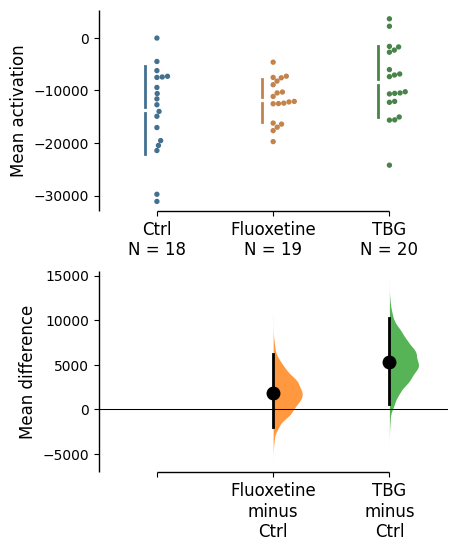

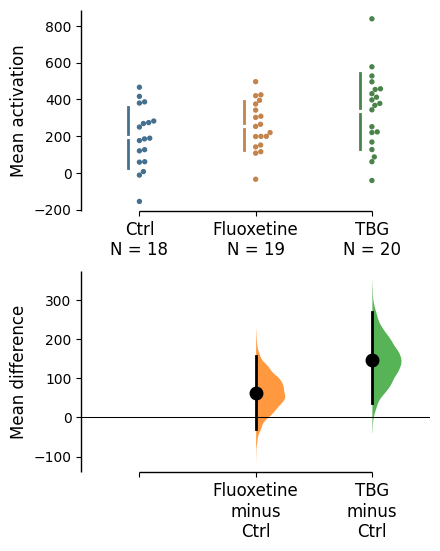

In [5]:
#create dictionary to store statistic results of each ICA
results = {}
HTR = data.columns[1:]

#Create a loop to iterate over all ICA_columns in Data
for y in range(len(HTR)):
    
    #create a looped y-input for dabest.load function
    experiment_column = HTR[y]
    
    # Load the data of first ICA into dabest
    dabest_obj = dabest.load(data=data.iloc[:,[0,(1+y)]], x="Group_name", y=experiment_column, idx=('Ctrl','Fluoxetine','TBG')) 

    # Plot the data of the first ICA
    # Add swarm_label="Mean activation" to change y-label
    dabest_obj.mean_diff.plot(raw_marker_size=2,
                              swarm_label="Mean activation"); # *If you want to check for batch effects, add 'color_col="Batch" as argument
    
    #store stat results in dictionary
    results[HTR[y]] = dabest_obj.mean_diff.results

In [6]:
for x in range(len(HTR)):
    results[HTR[x]].to_csv(f'/project/4180000.23/Fleur_GS/fsl_glm/5HT_smooth/{HTR[x]}_stats.csv')

In [ ]:
ICA2_data = dabest.load(data=data.iloc[:,[0,1,2,(4)]], x="Group", y= 'ICA_2',
                      idx=("Control", "Fluoxetine", "TBG"))

ICA2_data.mean_diff.plot(raw_marker_size=5,
                          swarm_label="Mean activation");

ICA2_results = ICA2_data.mean_diff.results
ICA2_data.mean_diff